### Import relevant packages:

In [13]:
import pandas as pd
import os
import sys
sys.path.append('../')
import freqcomb as fc

---
### Example for one molecule:

Set molecule name in Splatalogue nomenclature

In [2]:
mol = ' H2CS '

Query Splatalogue using astroquery. Possible options are minimum frequency (default: 'min_freq'=84.0*u.GHz), maximum frequency (default: max_freq=950.0*u.GHz), maximum upper energy in Kelvin (energy_max), intensity lower limit in base 10 logarithm of the integrated intensity in CDMS/JPL format (intensity_lower_limit).

In [3]:
H2CS_table = fc.query_splat(mol, energy_max=500.0)

See the resulting Astropy table

In [4]:
H2CS_table

Species,Chemical Name,"Freq-GHz(rest frame,redshifted)","Freq Err(rest frame,redshifted)","Meas Freq-GHz(rest frame,redshifted)","Meas Freq Err(rest frame,redshifted)",Resolved QNs,CDMS/JPL Intensity,S<sub>ij</sub>&#956;<sup>2</sup> (D<sup>2</sup>),S<sub>ij</sub>,Log<sub>10</sub> (A<sub>ij</sub>),Lovas/AST Intensity,E_L (cm^-1),E_L (K),E_U (cm^-1),E_U (K),Linelist
str4,str16,float64,float64,float64,float64,str17,float64,float64,float64,float64,str5,float64,float64,float64,float64,str3
H2CS,Thioformaldehyde,95.1082334,0.0001045,--,--,"13(1,12)-13(1,13)",-5.1507,1.20957,0.445,-6.82527,--,111.7947,160.84671,114.96717,165.41116,JPL
H2CS,Thioformaldehyde,--,--,101.47762,0.00012,"3(1,3)-2(1,2)",-3.6341,21.69902,7.98,-4.90073,0.49,12.5521,18.05957,15.93703,22.9297,JPL
H2CS,Thioformaldehyde,--,--,103.03999,0.0001,"3(2,2)-2(2,1)",-4.3594,4.52097,1.663,-5.08492,0.2,40.0668,57.64686,43.50384,62.59197,JPL
H2CS,Thioformaldehyde,--,--,103.04022,0.00015,"3(0,3)-2(0,2)",-4.0278,8.13836,2.993,-4.82961,0.2,3.4374,4.94562,6.87445,9.89075,JPL
H2CS,Thioformaldehyde,--,--,103.05181,0.00028,"3(2,1)-2(2,0)",-4.3593,4.52098,1.663,-5.08476,0.13,40.0669,57.647,43.50434,62.59268,JPL
H2CS,Thioformaldehyde,--,--,104.61704,7e-05,"3(1,2)-2(1,1)",-3.6079,21.70215,7.981,-4.86098,0.77,12.6568,18.21021,16.14645,23.231,JPL
H2CS,Thioformaldehyde,109.7093633,0.0001725,--,--,"14(1,13)-14(1,14)",-5.0909,1.12655,0.414,-6.7011,--,127.5742,183.54976,131.23371,188.81495,JPL
H2CS,Thioformaldehyde,125.3412339,0.0002735,--,--,"15(1,14)-15(1,15)",-5.0397,1.05438,0.388,-6.58527,--,144.4779,207.87027,148.65883,213.88567,JPL
H2CS,Thioformaldehyde,--,--,135.297811,0.00025,"4(1,4)-3(1,3)",-3.2444,30.5155,11.222,-4.48704,0.64,15.937,22.92966,20.45005,29.42289,JPL


Convert the Astropy table of query results into an easier to manage minimal format 

In [5]:
H2CS_minidf = fc.get_mini_df(H2CS_table)
H2CS_minidf

,Species,ChemicalName,QNs,Freq,log10_Aij,EU_K,CDMS/JPL Intensity
0,H2CS,Thioformaldehyde,"13(1,12)-13(1,13)",95.108233,-6.82527,165.41116,-5.1507
1,H2CS,Thioformaldehyde,"3(1,3)-2(1,2)",101.477620,-4.90073,22.92970,-3.6341
2,H2CS,Thioformaldehyde,"3(2,2)-2(2,1)",103.039990,-5.08492,62.59197,-4.3594
3,H2CS,Thioformaldehyde,"3(0,3)-2(0,2)",103.040220,-4.82961,9.89075,-4.0278
4,H2CS,Thioformaldehyde,"3(2,1)-2(2,0)",103.051810,-5.08476,62.59268,-4.3593
...,...,...,...,...,...,...,...
193,H2CS,Thioformaldehyde,"23(1,23)-22(1,22)",775.767296,-1.60629,460.57031,-1.5423
194,H2CS,Thioformaldehyde,"23(0,23)-22(0,22)",783.416523,-2.12921,452.96964,-1.9989
195,H2CS,Thioformaldehyde,"23(1,22)-22(1,21)",799.440115,-1.56714,474.33838,-1.5353
196,H2CS,Thioformaldehyde,"24(1,24)-23(1,23)",809.299845,-1.59188,499.41034,-1.5420


Plot frequency distribution and save it in the subdirectory './plots'

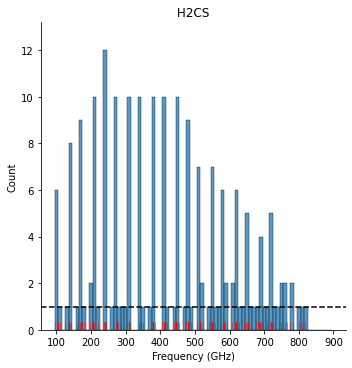

In [6]:
fc.plot_freq_dist(H2CS_minidf['Freq'], 
                  bin_width=10.0, 
                  title=mol, 
                  save_fig='{}_freq_dist'.format(mol), 
                  save_path='./plots')

Combine transitions based on the natural breaking points in their frequency distribution (using a kernel density estimator) and a desired threshold in km/s units. The results can be saved as a csv table by setting the 'save_combined' parameter to True. The transition groupings can optionally be saved as csv files by setting save_grouped=True so that we can investigate better which transitions are being combined into a group. The default location where tables are saved is a directory called 'tables' in the current working directory.

In [7]:
combined_df = fc.combine_transitions(H2CS_minidf, 
                                     vel_threshold=10.0, 
                                     save_combined=True, 
                                     save_grouped=True, 
                                     filename_prefix='H2CS', 
                                     save_path='./tables')

----
### Example for more molecules detected in protoplanetary disks:

First create a dictionary of molecule names can be used to loop over. The keys correspond to simple names that may be used for setting filenames and the values correspond to Splatalogue's nomenclature for the species of interest.

In [8]:
mol_dict = {'CN': ' CN v = 0 ', 
            'C15N': ' C15N ', 
            'OH': ' OH v=0 ', 
            'CO': ' CO v = 0 ', 
            '13CO+': ' 13CO+ v = 0 ', 
            'C18O': ' C18O ', 
            'C17O': ' C17O ', 
            'CS': ' CS v = 0 ', 
            'C34S': ' C34S v = 0 ', 
            '13CS': ' 13CS v = 0 ', 
            'SO': ' SO 3Σ v = 0 ', 
            'H2O': ' H2O v=0 ', 
            'HCO+': ' HCO\+ v=0 ',
            'DCO+': ' DCO\+ v = 0 ', 
            'H13CO+': ' H13CO\+ ', 
            'HCN': ' HCN v=0 ', 
            'DCN': ' DCN v = 0 ', 
            'H13CN': ' H13CN v = 0 ', 
            'HNC': ' HNC v=0 ', 
            'DNC': ' DNC ', 
            'H2S': ' H2S ', 
            'N2H+': ' N2H\+ v = 0 ', 
            'N2D+': ' N2D\+ ', 
            'CCH': ' CCH v = 0 ', 
            'CCD': ' CCD ', 
            'NH3': ' NH3 v=0 ', 
            'H2CO': ' H2CO ', 
            'H2CS': ' H2CS ', 
            'HC3N': ' HC3N v=0 ', 
            't-HCOOH': ' t-HCOOH ', 
            'c-C3H2': ' c-HCCCH  v=0 ', 
            'CH3OH': ' CH3OH vt = 0 ', 
            'CH3CN': ' CH3CN v = 0 '}

CN


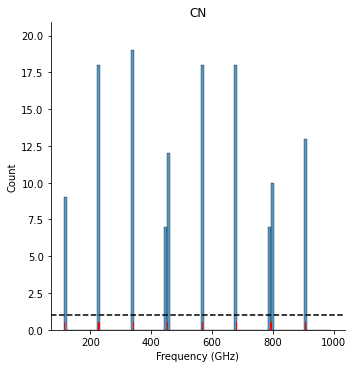

C15N


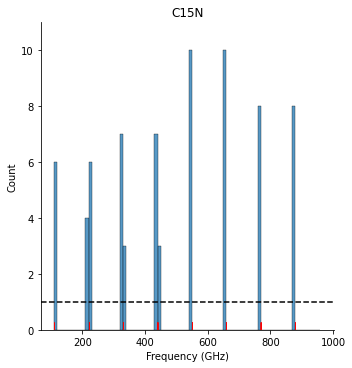

OH
The provided Astropy table is empty.
Nothing to plot.
The provided DataFrame is empty.
CO


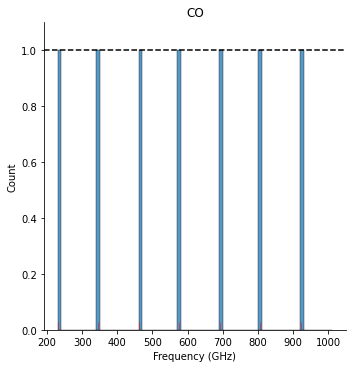

13CO+


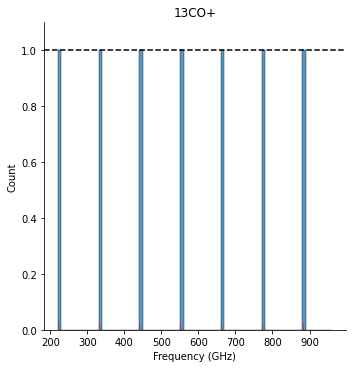

C18O


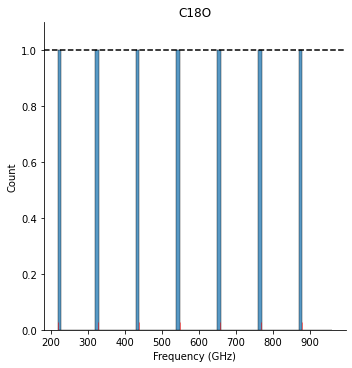

C17O


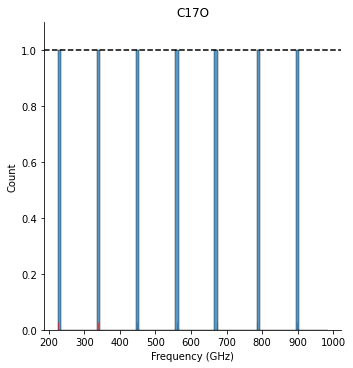

CS


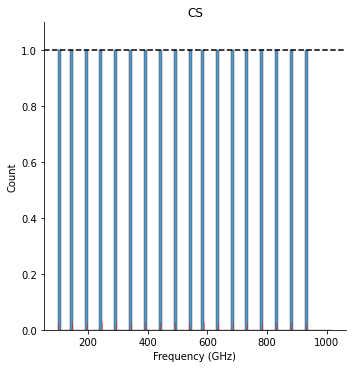

C34S


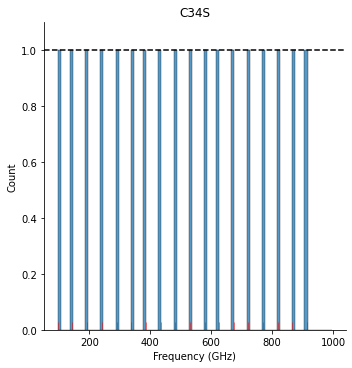

13CS


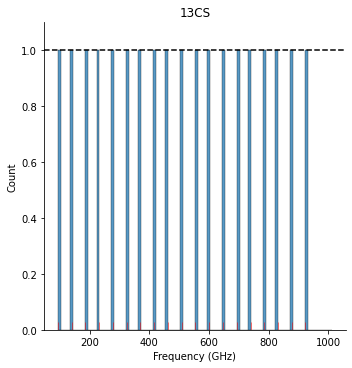

SO


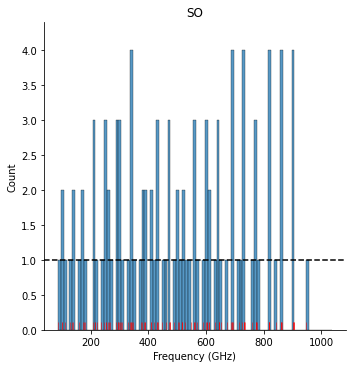

H2O


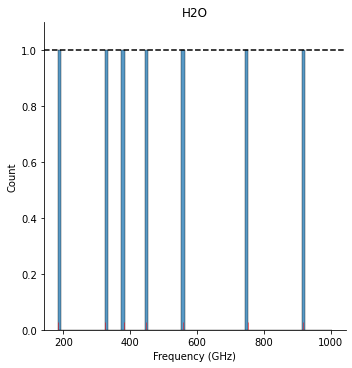

HCO+


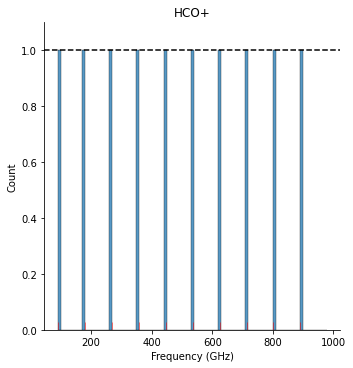

DCO+


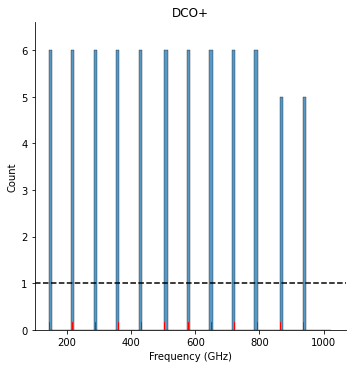

H13CO+


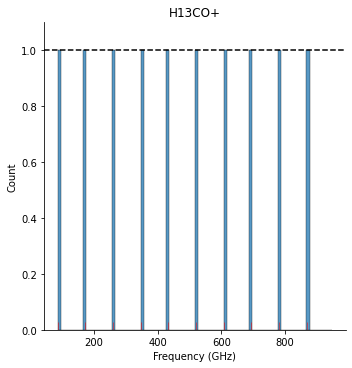

HCN


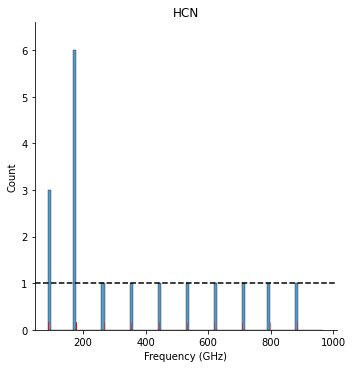

DCN


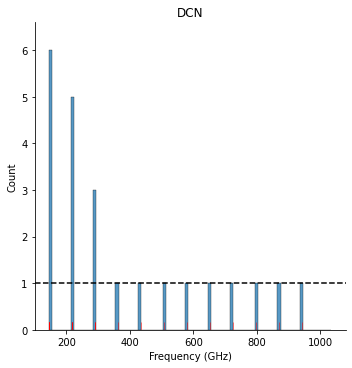

H13CN


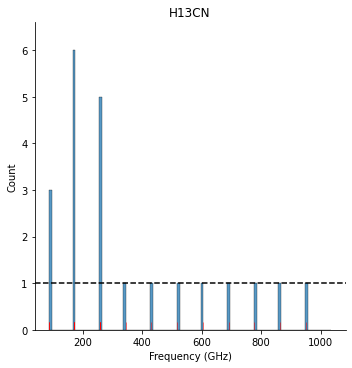

HNC


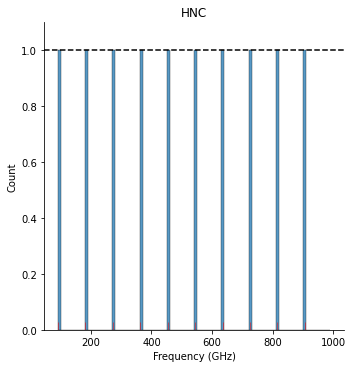

DNC


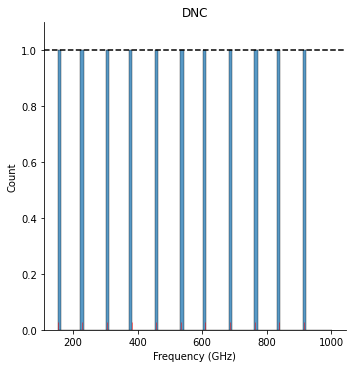

H2S


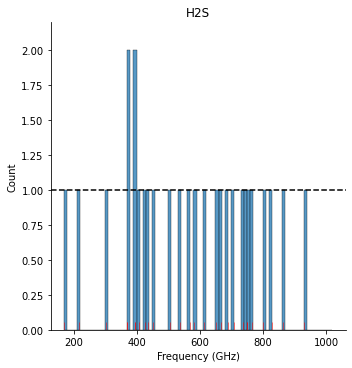

N2H+


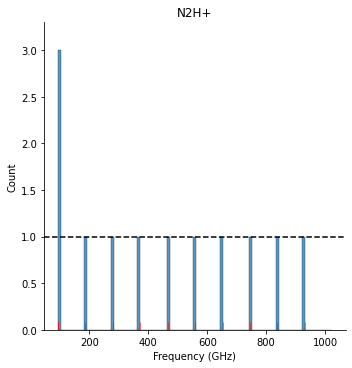

N2D+


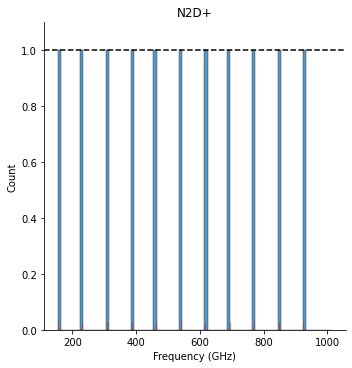

CCH


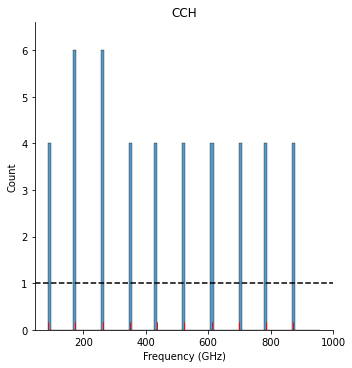

CCD


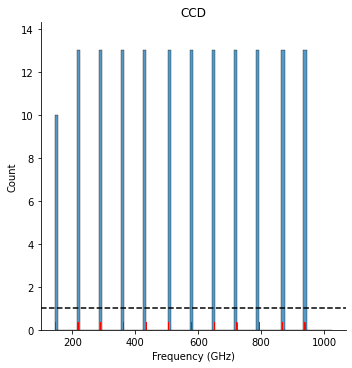

NH3


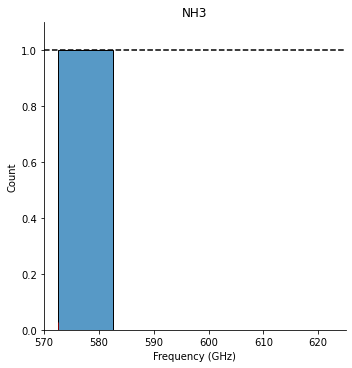

H2CO


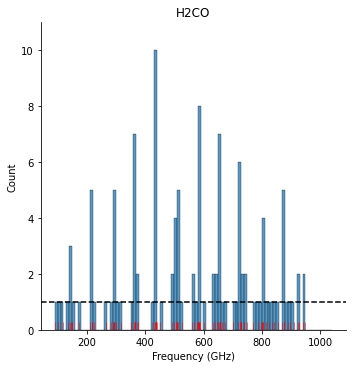

H2CS


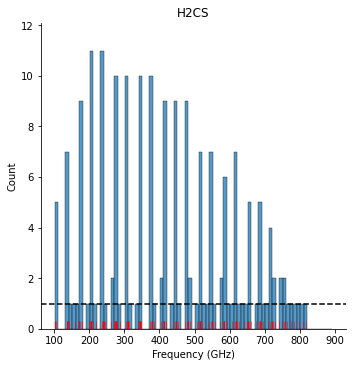

HC3N


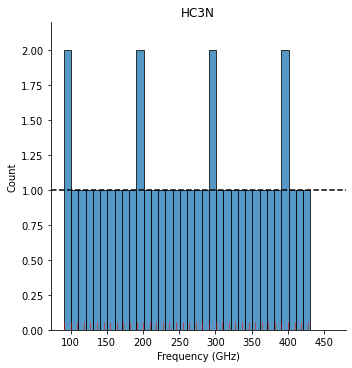

t_HCOOH


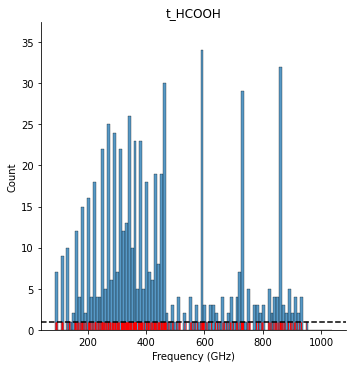

c-C3H2


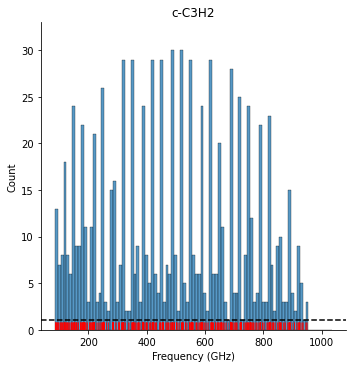

CH3OH


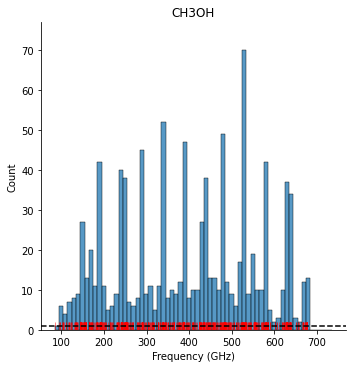

CH3CN


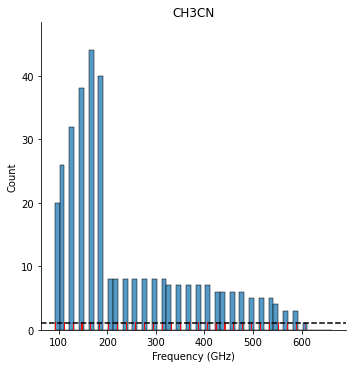

In [15]:
df_list = []
for mol_simple, mol_splat in mol_dict.items():
    print(mol_simple)
    
    # Query Splatalogue for a given molecule, with E_up < 500 K and CDMS/JPL intensity > 10^-5
    mytable = fc.query_splat(mol_splat, energy_max=500.0, intensity_lower_limit=-5)

    # Convert the Astropy table to a minimal format as a pandas.DataFrame
    mol_df = fc.get_mini_df(mytable)
    
    # Show and save plots of frequency distribution in subfolder './plots'
    fc.plot_freq_dist(frequencies=mol_df['Freq'], 
                      bin_width=10.0, 
                      title=mol_simple, 
                      show_fig=True,
                      save_fig='{}_freq_dist'.format(mol_simple))
    # Combine transitions based on the natural breaking points in their frequency distribution
    # (using a kernel density estimator) and a desired threshold in km/s units. The results can
    # be saved as a csv table by setting the 'save_combined' parameter to True. The transition 
    # groupings can optionally be saved in a csv file by setting save_grouped=True.
    combined_df = fc.combine_transitions(mol_df, 
                                         vel_threshold=10.0, 
                                         save_combined=True, 
                                         save_grouped=True, 
                                         filename_prefix=mol_simple)
    df_list.append(combined_df)

# Combine all DataFrames into one
all_mol_df = pd.concat(df_list)
save_path='./tables'
all_mol_df.to_csv(os.path.join(save_path, "allmols_combined_transitions.csv"), index=False)
    